In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
#2
print('2A: The primary utility of using tapering in the construction of spectrum estimates is to reshape bias towards only nearby frequencies. Tapering is done to reduce the smearing effect from convolution of the power spectral density if the time to record is not infinite.')
print('2B: The Welch Method is a method of tapering that does not reduce variance by averaging across measurements; instead, it splits each measurement into multiple windows and estimates the PSD and averages from the split measurements. Because of the averaging per measurement, it does have the tradeoff of reducing the frequency resolution however.')


2A: The primary utility of using tapering in the construction of spectrum estimates is to reshape bias towards only nearby frequencies. Tapering is done to reduce the smearing effect from convolution of the power spectral density if the time to record is not infinite.
2B: The Welch Method is a method of tapering that does not reduce variance by averaging across measurements; instead, it splits each measurement into multiple windows and estimates the PSD and averages from the split measurements. Because of the averaging per measurement, it does have the tradeoff of reducing the frequency resolution however.


Text(0, 0.5, 'Amplitude')

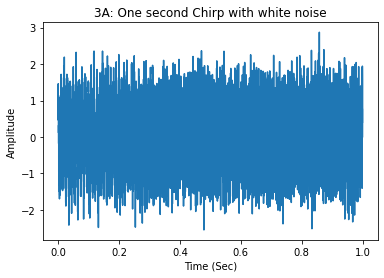

In [105]:
#3A

fs = 10000# sampling rate given
std = 0.5 #given standard deviation
noisemean = 0
t = np.arange(0,1,1/fs)

phi = []
signalf = []

phi =  2 * np.pi * (100*t + 400/3*(t**3))
signalf= np.cos(phi)  #Chirp

noise = np.random.normal(noisemean,std, len(t))

messychirp = signalf + noise

plt.figure()
plt.plot(t,messychirp)
plt.title('3A: One second Chirp with white noise')
plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')

3B: The multi-taper estimate with 4 DPSS tapers has a lower variance but a higher bias than the signal estimate itself. The multitaper estimate is different than the signal estimate from 400-500Hz


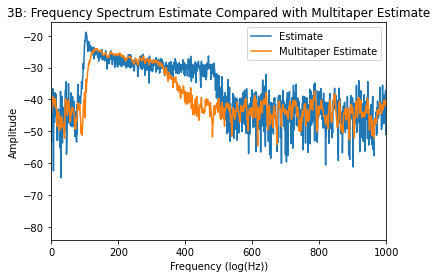

In [106]:
#3B
from numpy.fft import fft, ifft
from scipy import signal

signalFFT = np.fft.fft(messychirp,fs)
signalfreq = np.arange(0,fs)

#signalfreq = np.fft.fftfreq(len(signalFFT))

signalFFT = signalFFT[signalfreq < fs/2]
signalfreq = signalfreq[signalfreq < fs/2]

signalperiod = (np.abs(signalFFT)**2) / fs #may need to change Order of Operations
signalperiod /= signalperiod.sum()


N = fs # 1 second duration
NW = 4
Kmax = 4

wins, concentrations = signal.windows.dpss(N, NW, Kmax=Kmax, return_ratios=True)

periodfreq = []
specsignal = []

for i in range(0,3):
    currentfreq, currSignal = signal.periodogram(messychirp, window=wins[i], fs=fs)
    periodfreq.append(currentfreq)
    specsignal.append(currSignal)
    
specsignal = np.mean(specsignal,axis = 0)

plt.figure()
plt.plot(signalfreq, 10*np.log10(signalperiod), label = "Estimate")
plt.plot(periodfreq[0], 10*np.log10(specsignal), label = "Multitaper Estimate")
plt.title('3B: Frequency Spectrum Estimate Compared with Multitaper Estimate')
plt.xlabel('Frequency (log(Hz))')
plt.ylabel('Amplitude')
plt.xlim(0,1000)
plt.legend()

# plt.figure()
# for i in range(0,4):
#     plt.plot(t,wins[i])
# plt.title('First 4 DPSS Tapers')
# plt.xlabel('Time (S)')
# plt.ylabel('Amplitude')
print('3B: The multi-taper estimate with 4 DPSS tapers has a lower variance but a higher bias than the signal estimate itself. The multitaper estimate is different than the signal estimate from 400-500Hz')

3C: There are no observable differences from the reversed version of the chirp compared to the original as well as the reversed estimate and original estimate.


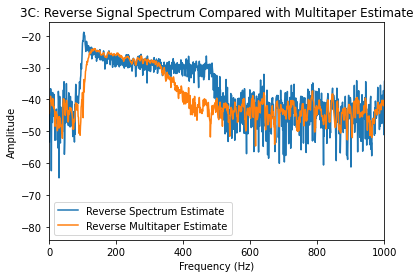

In [107]:
#3C
revphi = 2 * np.pi * (100*t + 400/3*(-t**3))
revsignal = np.cos(phi)
revmessychirp = revsignal + noise

revsignalFFT = np.fft.fft(revmessychirp,fs)
revsignalfreq = np.arange(0,fs)

revsignalFFT = revsignalFFT[revsignalfreq < fs/2]
revsignalfreq = revsignalfreq[revsignalfreq < fs/2]

revsignalperiod = (np.abs(revsignalFFT)**2) / fs #may need to change Order of Operations
revsignalperiod /= revsignalperiod.sum()

revwins, revconcentrations = signal.windows.dpss(N, NW, Kmax=Kmax, return_ratios=True)

revperiodfreq = []
revspecsignal = []

for i in range(0,3):
    revcurrentfreq, revcurrSignal = signal.periodogram(revmessychirp, window=revwins[i], fs=fs)
    revperiodfreq.append(revcurrentfreq)
    revspecsignal.append(revcurrSignal)
    
revspecsignal = np.mean(revspecsignal,axis = 0)

plt.figure()
plt.plot(revsignalfreq, 10*np.log10(revsignalperiod), label = "Reverse Spectrum Estimate")
plt.plot(revperiodfreq[0], 10*np.log10(revspecsignal), label = "Reverse Multitaper Estimate")
plt.title('3C: Reverse Signal Spectrum Compared with Multitaper Estimate')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,1000)
plt.legend()

print('3C: There are no observable differences from the reversed version of the chirp compared to the original as well as the reversed estimate and original estimate.')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 75 frequencies
Using 1 tapers
Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 75 frequencies
Using 1 tapers
3D: The spectrogram reveals a quadratic chirp that increases in background noise over time and increased frequency


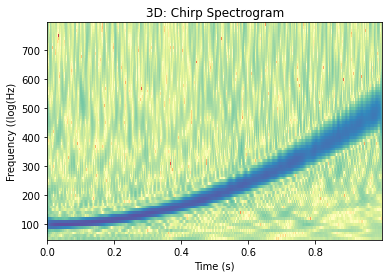

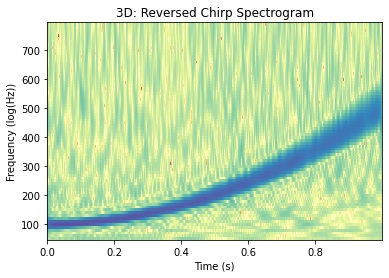

In [108]:
#3D
import tfr
freqs = np.arange(50,800,10) #lower freq, higher freq, length (in Hz)
n_cycles = 7
time_bandwidth = 2
psd, t = tfr.tfr_multitaper(messychirp[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=2, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(t, (freqs), 10 * np.log10(psd.squeeze()), cmap='Spectral', shading='auto')
plt.title('3D: Chirp Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency ((log(Hz)')


#rev chirp spectrogram
revpsd, revt = tfr.tfr_multitaper(revmessychirp[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=2, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(revt,(freqs), 10 * np.log10(revpsd.squeeze()), cmap='Spectral', shading='auto')
plt.title('3D: Reversed Chirp Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (log(Hz))')

print('3D: The spectrogram reveals a quadratic chirp that increases in background noise over time and increased frequency')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 75 frequencies
Using 4 tapers
Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 75 frequencies
Using 4 tapers
3E: The tradeoff for lower variance but increased bias is evident in the differences in the spectrogram plots from 3D and 3E. The band is much wider with the 4 tapers.


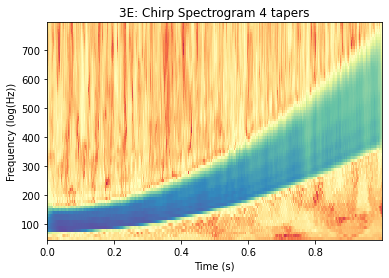

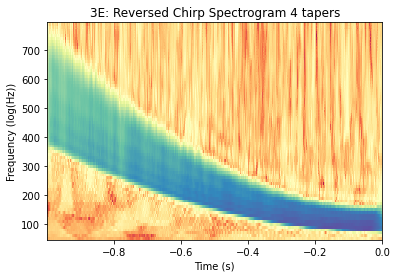

In [109]:
#3E
time_bandwidth=5 #number of tapers +1
psd4, t4 = tfr.tfr_multitaper(messychirp[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=time_bandwidth, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(t4, (freqs), 10 * np.log10(psd4.squeeze()), cmap='Spectral', shading='auto')
plt.title('3E: Chirp Spectrogram 4 tapers')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (log(Hz))')


#rev chirp spectrogram
revpsd4, revt4 = tfr.tfr_multitaper(revmessychirp[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=time_bandwidth, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(-revt4, (freqs), 10 * np.log10(revpsd4.squeeze()), cmap='Spectral', shading='auto')
plt.title('3E: Reversed Chirp Spectrogram 4 tapers')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (log(Hz))')

print('3E: The tradeoff for lower variance but increased bias is evident in the differences in the spectrogram plots from 3D and 3E. The band is much wider with the 4 tapers.')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 121 frequencies
Using 1 tapers
Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 121 frequencies
Using 1 tapers
4A: As seen in the two spectrograms, the frequency tiling is in fact producing the expected time-frequency tiling with higher time resolution at high frequencies and higher frequency resolution at low frequencies.


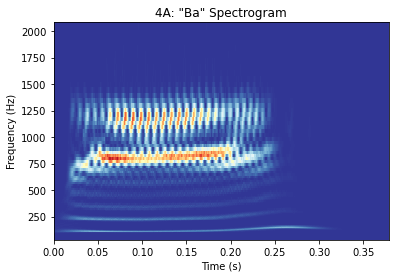

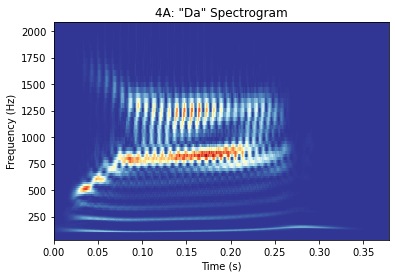

In [110]:
#4A
from IPython.display import Audio
from scipy.io import loadmat

speechdata = loadmat('speech', squeeze_me = True)

ba = speechdata['ba']
da = speechdata['da']
fs = speechdata['fs']

#time = np.arange(0, ba.shape[0]) / fs
lowrange = 32
freqs = []
freqs.append(lowrange) #not confident that the bins are correct. Need 20 per octive

i = 32
while i < 2048:
    i = i * (2**(1/20))
    freqs.append(i)

n_cycles = 9

bapsd, bat = tfr.tfr_multitaper(ba[None, None, :], fs, frequencies=freqs,
                             time_bandwidth=2, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(bat, freqs, bapsd.squeeze(), cmap='RdYlBu_r', shading='auto')
plt.title('4A: "Ba" Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

dapsd, dat = tfr.tfr_multitaper(da[None, None, :], fs, frequencies=freqs,
                             time_bandwidth=2, n_cycles=n_cycles)

plt.figure()
plt.pcolormesh(dat, freqs, dapsd.squeeze(), cmap='RdYlBu_r', shading='auto')
plt.title('4A: "Da" Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

print('4A: As seen in the two spectrograms, the frequency tiling is in fact producing the expected time-frequency tiling with higher time resolution at high frequencies and higher frequency resolution at low frequencies.')

In [111]:
Audio(data=ba, rate =fs) #plays unfiltered audio

In [112]:
#4B

print('4B: The formants for ba and da are likely different because the letter "b" is created from a more mild shape from the speakers mouth, while the letter "d" is created by pressing the toungue against the teeth and popping it off. This hard transition of the formant in the letter "d" to the soft letter "a" is likely what is observed in the very beginning of its spectrogram in 4A. The "da" sound has a sloping spectrogram in the beginning of the phase while the softer "ba" has a very mild beginning that nearly matches the "a" after. Creating "ba" by reshaping the speakers mouth simply has less of a transition than the creation of "da". In other words, "b" is more similar to "a" than "d" is to "a", and therefore the "ba" spectrogram is less varied.')

4B: The formants for ba and da are likely different because the letter "b" is created from a more mild shape from the speakers mouth, while the letter "d" is created by pressing the toungue against the teeth and popping it off. This hard transition of the formant in the letter "d" to the soft letter "a" is likely what is observed in the very beginning of its spectrogram in 4A. The "da" sound has a sloping spectrogram in the beginning of the phase while the softer "ba" has a very mild beginning that nearly matches the "a" after. Creating "ba" by reshaping the speakers mouth simply has less of a transition than the creation of "da". In other words, "b" is more similar to "a" than "d" is to "a", and therefore the "ba" spectrogram is less varied.


In [113]:
#5A
import pywt
#print(pywt.families(short=False))
tba = np.arange(0, ba.shape[0]+1) / fs
tda = np.arange(0, da.shape[0]+1) / fs
coeffs_ba = pywt.wavedec(ba,wavelet='coif3', level=5) 
coeffs_da = pywt.wavedec(da,wavelet='coif3', level=5)

# Convert to array -- easier for thresholding
baarr, baslices = pywt.coeffs_to_array(coeffs_ba)
bathresh = np.percentile(abs(baarr),66) #np.percentile finds the requested percentileof data via magnitude    
newcoeffsba = 0 #I am silly and forgot to look at the given jupyter notebook to see how you did this in a single line of code
for i in range(0,len(baarr)):
    if abs(baarr[i]) > bathresh:
        newcoeffsba += 1
#haris_coef = (abs(baarr) > bathresh).sum()
baarr[abs(baarr) < bathresh] = 0
baarr[baarr > bathresh] -= bathresh
baarr[baarr < -bathresh] += bathresh

        
daarr, daslices = pywt.coeffs_to_array(coeffs_da)
dathresh = np.percentile(abs(daarr),66)
newcoeffsda = 0 
for i in range(0,len(daarr)):
    if abs(daarr[i]) > dathresh:
        newcoeffsda += 1
daarr[abs(daarr) < dathresh] = 0
daarr[daarr > dathresh] -= dathresh
daarr[daarr < -dathresh] += dathresh

        
# Convert back to wavedec/waverec format
bacoeffs_denoised = pywt.array_to_coeffs(baarr, baslices, output_format='wavedec')
barecon_denoised = pywt.waverec(bacoeffs_denoised, wavelet='coif3')
#plt.figure()
#plt.plot(tba, barecon_denoised)

dacoeffs_denoised = pywt.array_to_coeffs(daarr, daslices, output_format='wavedec')
darecon_denoised = pywt.waverec(dacoeffs_denoised, wavelet='coif3')
#plt.figure()
#plt.plot(tda, darecon_denoised)

ncoeffs_ba = baarr.shape[0]
ncoeffs_da = daarr.shape[0]

print(f'Compressed size of Ba={newcoeffsda * 100./ ncoeffs_ba: .1f}% of original size')
print(f'Compressed size of Da ={newcoeffsba * 100./ ncoeffs_da: .1f}% of original size')
print('5A: As heard in the Audio below, there is no perceivable difference between the original audio and reconstructed audio with 66% of the data removed.')

Compressed size of Ba= 34.0% of original size
Compressed size of Da = 34.0% of original size
5A: As heard in the Audio below, there is no perceivable difference between the original audio and reconstructed audio with 66% of the data removed.


In [114]:
Audio(data=barecon_denoised, rate =fs) 

In [115]:
Audio(data=darecon_denoised, rate =fs)

In [116]:
Audio(data=ba, rate =fs) #raw Ba

In [117]:
Audio(data=da, rate =fs) #raw da

In [118]:
#5B and 5C Same as 5A but with new thresholds to input!

baarr, baslices = pywt.coeffs_to_array(coeffs_ba)
bathresh = np.percentile(abs(baarr),85) #np.percentile finds the requested percentile of data via magnitude    
newcoeffsba = 0 #I am silly and forgot to look at the given jupyter notebook to see how you did this in a single line of code
for i in range(0,len(baarr)):
    if abs(baarr[i]) > bathresh:
        newcoeffsba += 1
#haris_coef = (abs(baarr) > bathresh).sum()
baarr[abs(baarr) < bathresh] = 0
baarr[baarr > bathresh] -= bathresh
baarr[baarr < -bathresh] += bathresh

daarr, daslices = pywt.coeffs_to_array(coeffs_da)
dathresh = np.percentile(abs(daarr),85)
newcoeffsda = 0 
for i in range(0,len(daarr)):
    if abs(daarr[i]) > dathresh:
        newcoeffsda += 1
daarr[abs(daarr) < dathresh] = 0
daarr[daarr > dathresh] -= dathresh
daarr[daarr < -dathresh] += dathresh

# Convert back to wavedec/waverec format
bacoeffs_denoised = pywt.array_to_coeffs(baarr, baslices, output_format='wavedec')
barecon_denoised = pywt.waverec(bacoeffs_denoised, wavelet='coif3')
#plt.figure()
#plt.plot(tba, barecon_denoised)

dacoeffs_denoised = pywt.array_to_coeffs(daarr, daslices, output_format='wavedec')
darecon_denoised = pywt.waverec(dacoeffs_denoised, wavelet='coif3')
#plt.figure()
#plt.plot(tda, darecon_denoised)

ncoeffs_ba = baarr.shape[0]
ncoeffs_da = daarr.shape[0]

# print(ncoeffs_ba)
# print(newcoeffsba)
# print(ncoeffs_da)
# print(newcoeffsda)

print(f'Compressed size of Ba= {newcoeffsda * 100./ ncoeffs_ba: .1f}% of original size')
print(f'Compressed size of Da = {newcoeffsba * 100./ ncoeffs_da: .1f}% of original size')
print('5B: As the number of removed coefficients increases, it is expected that the distinguished sounds will become lesser. At around 85% compression, the "Ba" and "Da" are easily distinguishable from their original, but at 82.5% compression, the "Ba" and "Da" are perceptually indistinguishable from the original. Therefore 82.5% compression, or removing 82.5% of the coefficients, is approximately the most compressed the data can become while still sounding original.')
print('5C: At 98.5% Compression, the sounds are no longer distinguishable from each other, but at 97% compression, the starts of the sounds are distinguishable as a "Ba" or "Da". This means that 97% of the data can be removed and the consonants can still be distinguished from each other')

Compressed size of Ba=  15.0% of original size
Compressed size of Da =  15.0% of original size
5B: As the number of removed coefficients increases, it is expected that the distinguished sounds will become lesser. At around 85% compression, the "Ba" and "Da" are easily distinguishable from their original, but at 82.5% compression, the "Ba" and "Da" are perceptually indistinguishable from the original. Therefore 82.5% compression, or removing 82.5% of the coefficients, is approximately the most compressed the data can become while still sounding original.
5C: At 98.5% Compression, the sounds are no longer distinguishable from each other, but at 97% compression, the starts of the sounds are distinguishable as a "Ba" or "Da". This means that 97% of the data can be removed and the consonants can still be distinguished from each other


In [119]:
Audio(data=barecon_denoised, rate =fs) 

In [120]:
Audio(data=darecon_denoised, rate =fs) 

Compressed size =  2.2% of original size


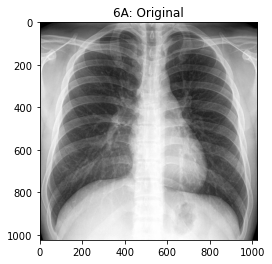

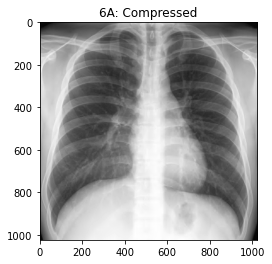

In [121]:
#6A
import imageio

chestradiograph = loadmat('chestradiograph', squeeze_me = True)
chestdata = chestradiograph['I']

plt.figure()
plt.imshow(chestdata, cmap='gray')
plt.title('6A: Original')

chestcoeffs = pywt.wavedec2(chestdata, wavelet='db2', level=6)


# Convert to array -- easier for thresholding
chestarr, chestslices = pywt.coeffs_to_array(chestcoeffs)
ncoeffs = (abs(chestarr) > 0).sum()

chestthresh = np.percentile(abs(chestarr), 95)
chestarr[abs(chestarr) < chestthresh] = 0
chestarr[chestarr > chestthresh] -= chestthresh
chestarr[chestarr < -chestthresh] += chestthresh
ncoeffs_compressed = (abs(chestarr) > chestthresh).sum()

# Convert back to wavedec/waverec format
coeffs_compressed = pywt.array_to_coeffs(chestarr, chestslices, output_format='wavedec2')
compressed = pywt.waverec2(coeffs_compressed, wavelet='db2')

plt.figure()
plt.imshow(compressed, cmap='gray')
plt.title('6A: Compressed')
print(f'Compressed size = {ncoeffs_compressed * 100./ ncoeffs: .1f}% of original size')

6B: After sharpening the compressed image, there is a minor observable difference between the 97.8% compressed image and the original after sharpening. This is incredible as it greatly reduces storage time and space while keeping most of the resolution. Using traditional sharpening techniques yielded a much darker photo, this is hypothesized to be due to the compression removing data and replacing with 0s, so when the pixel is sharpened via the surrounding pixels, the rest of the remaining pixels are effected by the removed data. To avoid major darkening, a bias was implemented onto the main pixel. Darkening still occured and there is less overall sharpening, but the tradeoff is warranted for the brightness benefit.


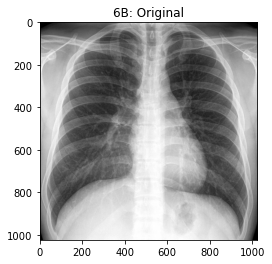

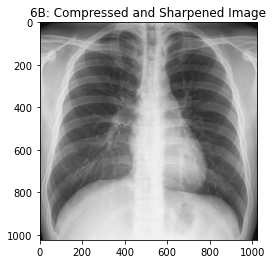

In [122]:
#6B
from scipy import ndimage as img

plt.figure()
plt.imshow(chestdata, cmap='gray')
plt.title('6B: Original')

sharpenarray = np.asarray([[-1, -1, -1], [-1, 15, -1], [-1, -1, -1]])
sharpencompressed = img.convolve(compressed, sharpenarray, mode='nearest')


plt.figure()
plt.imshow(sharpencompressed, cmap='gray')
plt.title('6B: Compressed and Sharpened Image')

print('6B: After sharpening the compressed image, there is a minor observable difference between the 97.8% compressed image and the original after sharpening. This is incredible as it greatly reduces storage time and space while keeping most of the resolution. Using traditional sharpening techniques yielded a much darker photo, this is hypothesized to be due to the compression removing data and replacing with 0s, so when the pixel is sharpened via the surrounding pixels, the rest of the remaining pixels are effected by the removed data. To avoid major darkening, a bias was implemented onto the main pixel. Darkening still occured and there is less overall sharpening, but the tradeoff is warranted for the brightness benefit.')